#### Makarova Evgeniia
#### Alejandro Pereña López

# Practica 1. Naive-Bayes

## Apartado 1: Particionado
Análisis de las dos estrategias de particionado propuestas: simple, y cruzada, para los conjuntos propuestos: german y tic-tac-toe. El análisis consiste en una descripción de los índices de train y test devueltos por cada uno de los métodos de particionado, junto con un comentario sobre las ventajas/desventajas de cada uno de ellos.

In [1]:
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import *

from Datos import *
import EstrategiaParticionado
import Clasificador

from naive_bayes_functions import *

__Validación simple__: Este metodo de particionado divide los datos en 2 partes dada la proporción de datos test y train. Antes de la división los ids de las filas están mezcladas de manera aleatoria para asegurarse que los datos en train and test no esten en el mismo orden que  en el conjunto de datos original (por si están ordenados por clases o algún atributo.

__Ventajas__: Implementación simple y rápida

__Desventajas__: Si el conjunto de datos es pequeño quedan pocos datos para la validación. 

In [2]:
dataset=Datos('tic-tac-toe.data')
estrategia=EstrategiaParticionado.ValidacionSimple(0.3, 1)
# 0.3 = test_proportion, 1 = n_iters
parts = estrategia.creaParticiones(dataset.datos)

print("Test: ", parts[0].indicesTest)

Test:  [2, 5, 11, 15, 18, 27, 28, 31, 35, 37, 38, 40, 42, 45, 48, 49, 50, 51, 56, 58, 63, 65, 67, 69, 72, 73, 75, 76, 77, 80, 82, 88, 92, 106, 110, 111, 112, 116, 118, 119, 120, 121, 122, 123, 125, 129, 132, 133, 135, 137, 141, 144, 151, 154, 155, 156, 160, 161, 167, 170, 171, 185, 186, 191, 194, 198, 202, 205, 207, 222, 223, 224, 229, 231, 232, 233, 243, 245, 247, 254, 259, 261, 267, 272, 275, 279, 285, 286, 287, 289, 290, 293, 294, 301, 306, 307, 311, 312, 313, 315, 317, 318, 319, 321, 324, 325, 326, 333, 334, 338, 344, 346, 348, 350, 353, 354, 356, 364, 367, 368, 375, 378, 379, 388, 389, 391, 393, 396, 399, 401, 403, 410, 412, 418, 422, 424, 425, 426, 428, 431, 433, 434, 436, 438, 440, 441, 450, 458, 460, 463, 465, 480, 481, 492, 493, 495, 496, 498, 500, 508, 510, 514, 519, 522, 527, 532, 534, 536, 540, 541, 543, 544, 547, 548, 553, 555, 558, 559, 562, 566, 569, 574, 575, 578, 579, 580, 582, 583, 591, 594, 596, 597, 599, 600, 601, 611, 612, 614, 622, 623, 627, 631, 646, 647, 663, 66

Para extraer los datos se utiliza el metodo extraeDatos:

In [3]:
train=dataset.extraeDatos(parts[0].indicesTrain)
test=dataset.extraeDatos(parts[0].indicesTest)
print(test)

[['x' 'x' 'x' ... 'o' 'x' 'positive']
 ['x' 'x' 'x' ... 'b' 'o' 'positive']
 ['x' 'x' 'x' ... 'o' 'o' 'positive']
 ...
 ['x' 'o' 'o' ... 'x' 'o' 'negative']
 ['o' 'x' 'o' ... 'o' 'x' 'negative']
 ['o' 'x' 'o' ... 'o' 'x' 'negative']]


__Validación cruzada__: En este tipo de validación el conjunto de datos de divide de manera aleatoria en N grupos, y uno de los grupos se utiliza para test y otros N-1 para train. De esta manera generamos N diferentes subconjuntos de train/test.
![alt text](K-fold_cross_validation.jpg "K-Fold Cross Validation")

__Ventajas__:Se utiliza el conjunto completo de datos para entrenamiento y para la validación y se puede generar más metricas para ver si el modelo el robusto.

__Desventajas__: El algoritmo hay que repetir N veces, lo que conlleva mayor coste computacional.

In [4]:
estrategia=EstrategiaParticionado.ValidacionCruzada(4)
# 4 = n_partitions
parts = estrategia.creaParticiones(dataset.datos)
print("Test ids con segundo grupo asignado como test y train el resto:")
print(parts[1].indicesTest)

Test ids con segundo grupo asignado como test y train el resto:
[2, 8, 11, 12, 15, 18, 19, 21, 22, 24, 26, 30, 42, 46, 48, 52, 60, 62, 63, 64, 65, 66, 70, 80, 98, 105, 106, 107, 116, 120, 126, 135, 137, 140, 141, 142, 147, 155, 157, 163, 165, 166, 170, 171, 172, 175, 177, 178, 182, 194, 195, 198, 202, 203, 205, 212, 215, 220, 225, 226, 229, 237, 239, 240, 241, 244, 247, 252, 254, 256, 257, 258, 261, 263, 264, 269, 274, 276, 282, 284, 286, 290, 302, 305, 307, 316, 318, 321, 324, 326, 328, 342, 343, 344, 346, 358, 364, 365, 367, 368, 376, 381, 384, 386, 388, 389, 390, 391, 392, 393, 395, 403, 405, 409, 419, 425, 431, 432, 440, 443, 446, 452, 461, 462, 463, 464, 474, 479, 480, 487, 497, 510, 511, 517, 525, 530, 534, 541, 550, 552, 553, 557, 558, 561, 563, 567, 574, 575, 581, 585, 587, 593, 594, 599, 606, 613, 620, 621, 622, 632, 633, 635, 636, 644, 654, 665, 666, 671, 675, 680, 685, 698, 700, 703, 706, 708, 715, 718, 719, 725, 732, 735, 742, 747, 748, 752, 755, 757, 761, 762, 769, 771, 77

## Apartado 2: Naive-Bayes
Tabla con los resultados de la ejecución para los conjuntos de datos analizados (tic-tac-toe y german). Considerar los dos tipos de particionado.
Los resultados se refieren a las tasas de error/acierto y deben incluirse tanto con la corrección de Laplace como sin ella. Se debe incluir tanto el promedio de error para las diferentes particiones como su desviación típica. Es importante mostrar todos los resultados agrupados en una tabla para facilitar su evaluación.
Breve análisis de los resultados anteriores.

In [5]:
print("Validacion simple:")
tictac=Datos('tic-tac-toe.data')
#test_proportion = 0.3, n_iters = 1
estrategia=EstrategiaParticionado.ValidacionSimple(0.3, 1)
clasificador=Clasificador.ClasificadorNaiveBayes(False)
errores=clasificador.validacion(estrategia,tictac,clasificador)
print("Tic tac toe error (sin laplace)", errores[0])
print("desviacion", errores[1])
print()
estrategia=EstrategiaParticionado.ValidacionSimple(0.3, 1)
clasificador=Clasificador.ClasificadorNaiveBayes(True)
errores=clasificador.validacion(estrategia,tictac,clasificador)
print("Tic tac toe error (con laplace)", errores[0])
print("desviacion", errores[1])
print()

german=Datos('german.data') 
estrategia=EstrategiaParticionado.ValidacionSimple(0.3, 1)
clasificador=Clasificador.ClasificadorNaiveBayes(False)
errores=clasificador.validacion(estrategia,german,clasificador)
print("German error (sin laplace)", errores[0])
print("desviacion", errores[1])
print()
estrategia=EstrategiaParticionado.ValidacionSimple(0.3, 1)
clasificador=Clasificador.ClasificadorNaiveBayes(True)
errores=clasificador.validacion(estrategia,german,clasificador)
print("German error (con laplace)", errores[0])
print("desviacion", errores[1])
print()

Validacion simple:
Tic tac toe error (sin laplace) 0.3170731707317073
desviacion 0.0

Tic tac toe error (con laplace) 0.29965156794425085
desviacion 0.0

German error (sin laplace) 0.25666666666666665
desviacion 0.0

German error (con laplace) 0.27
desviacion 0.0



In [6]:
print("Validacion cruzada:")
#n_partitions = 4
estrategia=EstrategiaParticionado.ValidacionCruzada(4)
clasificador=Clasificador.ClasificadorNaiveBayes(False)
errores=clasificador.validacion(estrategia,tictac,clasificador)
print("Tic-tac-toe error (sin laplace)", errores[0])
print("desviacion", errores[1])
print()
estrategia=EstrategiaParticionado.ValidacionCruzada(4)
clasificador=Clasificador.ClasificadorNaiveBayes(True)
errores=clasificador.validacion(estrategia,tictac,clasificador)
print("Tic-tac-toe error (con laplace)", errores[0])
print("desviacion", errores[1])
print()

estrategia=EstrategiaParticionado.ValidacionCruzada(4)
clasificador=Clasificador.ClasificadorNaiveBayes(False)
errores=clasificador.validacion(estrategia,german,clasificador)
print("german error (sin laplace)", errores[0])
print("desviacion", errores[1])
print()
estrategia=EstrategiaParticionado.ValidacionCruzada(4)
clasificador=Clasificador.ClasificadorNaiveBayes(True)
errores=clasificador.validacion(estrategia,german,clasificador)
print("german error (con laplace)", errores[0])
print("desviacion", errores[1])
print()

Validacion cruzada:
Tic-tac-toe error (sin laplace) 0.29959466527196654
desviacion 0.031044297381814075

Tic-tac-toe error (con laplace) 0.27973762203626223
desviacion 0.009440874576857225

german error (sin laplace) 0.23299999999999998
desviacion 0.009949874371066198

german error (con laplace) 0.23099999999999998
desviacion 0.018841443681416766



__Error con validación simple__

|Dataset|tic-tac-toe|german|
|-------|-----------|------|
|Error (Sin Laplace)| 0.317| 0.257|
|Error (Laplace)| 0.3| 0.27|

__Error con validación cruzada__

|Dataset|tic-tac-toe|german|
|-------|-----------|------|
|Mean Error| 0.29 | 0.23|
|Std| 0.02| 0.013|


El error aplicando y no aplicando Laplace para estos conjuntos de datos es parecido, no influye mucho a la precisión de clasificador. 
El error de validación cruzada es más bajo porque hemos utilzado más datos para entrenamiento en cada de sus iteraciones (75% vs 70% en validación simple).
La desviación de la validación simple es 0 porque solo hacemos partición de los datos, por lo que solo hay un valor de error.

## Apartado 3: Scikit-Learn
Incluir los mismos resultados que en el apartado 2 pero usando los métodos del paquete scikit-learn. Comparar y analizar los resultados.

In [7]:
#bayes type = gaussian or multinomial
def error_sklearn_bayes(train, test, bayes_type):
    #Preparando los datos conviertiendo datos categoricos a numericos
    le = preprocessing.LabelEncoder()

    train_a=np.empty([train.shape[0], train.shape[1]])
    test_a=np.empty([test.shape[0], test.shape[1]])
    for i in range(train.shape[1]):
        train_column=train[:,i]
        train_column=le.fit_transform(train_column)
        train_a[:,i]=np.transpose(train_column)
    for i in range(test.shape[1]):    
        test_column=test[:,i]
        test_column=le.fit_transform(test_column)
        test_a[:,i]=np.transpose(test_column)


    input_train=[]
    for row in range(train_a.shape[0]):
        input_train.append(train_a[row,0:-1])
    classes_encoded=train_a[:,-1]

    validation=[]
    real_class=[]
    for row in range(test_a.shape[0]):
        validation.append(test_a[row,0:-1])
        real_class.append(test_a[row,-1])


    if bayes_type=="gaussian":
        clf = GaussianNB()
    else:
        clf = MultinomialNB()
            


    clf.fit(input_train, classes_encoded)

    error=0
    for r in range(len(validation)):
        predicted=clf.predict([validation[r]])
        if predicted!=real_class[r]:
            error+=1
    error=error/len(validation)
    #print("Error validación simple:", error)
    #print("Fit score:", clf.score(input_array, classes_encoded))
    return(error)

tictac=Datos('tic-tac-toe.data') 
estrategia=EstrategiaParticionado.ValidacionSimple(0.3, 1)
# 0.3 = test_proportion, 1 = n_iters
parts = estrategia.creaParticiones(tictac.datos)
train_tic=tictac.extraeDatos(parts[0].indicesTrain)
test_tic=tictac.extraeDatos(parts[0].indicesTest)

german=Datos('german.data') 
estrategia=EstrategiaParticionado.ValidacionSimple(0.3, 1)
# 0.3 = test_proportion, 1 = n_iters
parts = estrategia.creaParticiones(german.datos)
train_german=german.extraeDatos(parts[0].indicesTrain)
test_german=german.extraeDatos(parts[0].indicesTest)


print("Error validación simple:")
print("Bayes gaussiano:")
print("Tic tac toe:", error_sklearn_bayes(train_tic, test_tic, "gaussian"))
print("German:", error_sklearn_bayes(train_german, test_german , "gaussian"))
print("Bayes multinomial:")
print("Tic tac toe:", error_sklearn_bayes(train_tic, test_tic, "multinomial"))
print("German:", error_sklearn_bayes(train_german, test_german , "multinomial"))

Error validación simple:
Bayes gaussiano:
Tic tac toe: 0.25435540069686413
German: 0.29333333333333333
Bayes multinomial:
Tic tac toe: 0.31010452961672474
German: 0.29


In [8]:
##Cruzada
partitions=4
#Tic tac
#line_ids_tic=validacion_cruzada(rows_tictac,partitions)
error_cross_tictac_g=[]
error_cross_tictac_m=[]

tictac=Datos('tic-tac-toe.data') 
estrategia=EstrategiaParticionado.ValidacionCruzada(partitions)
parts = estrategia.creaParticiones(tictac.datos)

for i in range(partitions):
    train=tictac.extraeDatos(parts[i].indicesTrain)
    test=tictac.extraeDatos(parts[i].indicesTest)
    error_cross_tictac_g.append(error_sklearn_bayes(train, test, "gaussian"))
    error_cross_tictac_m.append(error_sklearn_bayes(train, test, "multinomial"))

#line_ids_german=validacion_cruzada(rows_german,partitions)
error_cross_german_g=[]
error_cross_german_m=[]

german=Datos('german.data') 
estrategia=EstrategiaParticionado.ValidacionCruzada(partitions)
parts = estrategia.creaParticiones(german.datos)

for i in range(partitions):
    train=german.extraeDatos(parts[i].indicesTest)
    test=german.extraeDatos(parts[i].indicesTest)
    error_cross_german_g.append(error_sklearn_bayes(train, test,  "gaussian"))
    error_cross_german_m.append(error_sklearn_bayes(train, test,  "multinomial"))
    
print("Error validación cruzada:")
print("Bayes gaussiano")
print("Tic-tac-toe", error_cross_tictac_g, "Mean: ", np.mean(error_cross_tictac_g), "Std:", np.std(error_cross_tictac_g))
print("German", error_cross_german_g, "Mean: ", np.mean(error_cross_german_g), "Std:", np.std(error_cross_german_g))

print("Bayes multinomial")
print("Tic-tac-toe", error_cross_tictac_m, "Mean: ", np.mean(error_cross_tictac_m), "Std:", np.std(error_cross_tictac_m))
print("German", error_cross_german_m, "Mean: ", np.mean(error_cross_german_m), "Std:", np.std(error_cross_german_m))


Error validación cruzada:
Bayes gaussiano
Tic-tac-toe [0.2833333333333333, 0.24166666666666667, 0.2928870292887029, 0.29707112970711297] Mean:  0.278739539748954 Std: 0.021975551806170016
German [0.244, 0.284, 0.232, 0.572] Mean:  0.33299999999999996 Std: 0.13932336487466843
Bayes multinomial
Tic-tac-toe [0.3333333333333333, 0.3, 0.3891213389121339, 0.3472803347280335] Mean:  0.3424337517433752 Std: 0.03196349896571028
German [0.296, 0.368, 0.308, 0.296] Mean:  0.317 Std: 0.029849623113198602


__Resultados:__


__Error con validación simple__


|Dataset|tic-tac-toe|german|
|-------|-----------|------|
|Clasificador de práctica | 0.3| 0.27|
|SKlearn Gaussian|0.254|0.293|
|SKlearn multinomial|0.31|0.29|


__Error con validación cruzada__

|Dataset|tic-tac-toe|german|
|-------|-----------|------|
||Error Promedio||
|Clasificador de práctica| 0.29 | 0.23|
|SKlearn Gaussian| 0.278 | 0.333|
|SKlearn multinomial| 0.342 | 0.317|
||Desviación estandar||
|Clasificador de práctica| 0.02| 0.013|
|SKlearn Gaussian| 0.022| 0.139|
|SKlearn multinomial| 0.032| 0.0298|


## Apartado 4: Evaluación de hipótesis mediante Análisis ROC
__Matriz de confusión__

In [9]:
#positive and negative are the classes names that need to be compared
def confusion_mx(dataset, train, test, laplace, positive, negative):
    confusion_matrix=np.zeros([2,2])
    for r in range(test.shape[0]):
        predicted=naive_bayes(dataset, train, test[r][0:-1], laplace)
        real=test[r][-1]
        if predicted==positive:
            if real==positive:
                confusion_matrix[0,0]+=1
            else: 
                confusion_matrix[0,1]+=1
        else:
            if real==negative:
                confusion_matrix[1,1]+=1
            else: 
                confusion_matrix[1,0]+=1

    return(confusion_matrix)

tictac=Datos('tic-tac-toe.data') 
estrategia=EstrategiaParticionado.ValidacionSimple(0.3, 1)
# 0.3 = test_proportion, 1 = n_iters
parts = estrategia.creaParticiones(tictac.datos)
train_tic=tictac.extraeDatos(parts[0].indicesTrain)
test_tic=tictac.extraeDatos(parts[0].indicesTest)

confusion_matrix_tic=confusion_mx(tictac, train_tic, test_tic, True, "positive", "negative")
print("Confusion matrix")
print("Tic tac toe:")
print(confusion_matrix_tic)
tp=confusion_matrix_tic[0,0]
fn=confusion_matrix_tic[1,0]
fp=confusion_matrix_tic[0,1]
tn=confusion_matrix_tic[1,1]

tpr=round(tp/(tp+fn),2)
fnr=round(fn/(tp+fn),2)
fpr=round(fp/(fp+tn),2)
tnr=round(tn/(fp+tn),2)
print("TPR:", tpr, "FNR: ", fnr, "FPR: ", fpr, "TNR: ", tnr)

german=Datos('german.data') 
estrategia=EstrategiaParticionado.ValidacionSimple(0.3, 1)
# 0.3 = test_proportion, 1 = n_iters
parts = estrategia.creaParticiones(german.datos)
train_german=german.extraeDatos(parts[0].indicesTrain)
test_german=german.extraeDatos(parts[0].indicesTest)

confusion_matrix_german=confusion_mx(german, train_german, test_german, True, 1, 2)
print("German:")
print(confusion_matrix_german)
tp=confusion_matrix_german[0,0]
fn=confusion_matrix_german[1,0]
fp=confusion_matrix_german[0,1]
tn=confusion_matrix_german[1,1]

tpr=round(tp/(tp+fn),2)
fnr=round(fn/(tp+fn),2)
fpr=round(fp/(fp+tn),2)
tnr=round(tn/(fp+tn),2)
print("TPR:", tpr, "FNR: ", fnr, "FPR: ", fpr, "TNR: ", tnr)

Confusion matrix
Tic tac toe:
[[163.  52.]
 [ 31.  41.]]
TPR: 0.84 FNR:  0.16 FPR:  0.56 TNR:  0.44
German:
[[168.  46.]
 [ 43.  43.]]
TPR: 0.8 FNR:  0.2 FPR:  0.52 TNR:  0.48


__Matriz de confusión:__

Tic tac toe

||Real||
|----|----|----|
|Clase|Positivo|Negativo|
|Positivo|163|52|
|Negativo|31|41|


|TPR|FNR|FPR|TNR|
|---|---|---|---|
|0.84|0.16|0.56|0.44|


German

||Real||
|----|----|----|
|Clase|1|2|
|1|168|46|
|2|43|43|

|TPR|FNR|FPR|TNR|
|---|---|---|---|
|0.8|0.2|0.52|0.48|


En ambos conjuntos de datos el clasificador tiene un ratio elevado para falsos positivos, tiene errores elevador en clasificación de clase 2 (negativos en tic-tac-toe y 2 en german).

__Curvas ROC__

[0.         0.         0.00606061 0.01212121 0.01818182 0.02424242
 0.02424242 0.03030303 0.03636364 0.04242424 0.04848485 0.05454545
 0.06060606 0.06666667 0.07272727 0.07878788 0.08484848 0.08484848
 0.09090909 0.0969697  0.1030303  0.10909091 0.11515152 0.12121212
 0.12727273 0.13333333 0.13333333 0.13939394 0.14545455 0.15151515
 0.15757576 0.16363636 0.16969697 0.17575758 0.18181818 0.18787879
 0.19393939 0.2        0.20606061 0.21212121 0.21818182 0.22424242
 0.23030303 0.23636364 0.24242424 0.24848485 0.25454545 0.26060606
 0.26666667 0.27272727 0.27878788 0.27878788 0.28484848 0.29090909
 0.2969697  0.3030303  0.30909091 0.31515152 0.32121212 0.32727273
 0.33333333 0.33939394 0.34545455 0.35151515 0.35757576 0.36363636
 0.36969697 0.37575758 0.38181818 0.38787879 0.39393939 0.4
 0.4        0.40606061 0.41212121 0.41818182 0.42424242 0.43030303
 0.43636364 0.44242424 0.44848485 0.45454545 0.46060606 0.46666667
 0.47272727 0.47878788 0.48484848 0.49090909 0.4969697  0.5030303
 0.

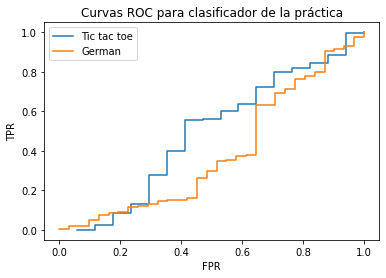

In [10]:
import matplotlib.pyplot as plt
def roc(dataset, train, test, laplace, positive, negative):
    p_counts=[]
    n_counts=[]
    p=0
    n=0
    total=test.shape[0]
    for r in range(total):
        predicted=naive_bayes(dataset, train, test[r][0:-1], laplace)
        real=test[r][-1]
        if (predicted==positive) and (real==positive):
            p+=1
        elif (predicted==negative) and (real==positive):
            n+=1
        p_counts.append(p)
        n_counts.append(n)
    tpr=np.array(p_counts)/p
    fpr=np.array(n_counts)/n
    return(tpr, fpr)

tictac=Datos('tic-tac-toe.data') 
estrategia=EstrategiaParticionado.ValidacionSimple(0.3, 1)
# 0.3 = test_proportion, 1 = n_iters
parts = estrategia.creaParticiones(tictac.datos)
train_tic=tictac.extraeDatos(parts[0].indicesTrain)
test_tic=tictac.extraeDatos(parts[0].indicesTest)

german=Datos('german.data') 
estrategia=EstrategiaParticionado.ValidacionSimple(0.3, 1)
# 0.3 = test_proportion, 1 = n_iters
parts = estrategia.creaParticiones(german.datos)
train_german=german.extraeDatos(parts[0].indicesTrain)
test_german=german.extraeDatos(parts[0].indicesTest)

tpr_tic, fpr_tic = roc(tictac, train_tic, test_tic, True, "positive", "negative")
tpr_german, fpr_german = roc(german, train_german, test_german, True, 1, 2)
print(tpr_tic)
plt.figure
plt.plot(fpr_tic, tpr_tic, label="Tic tac toe")
plt.plot(fpr_german, tpr_german, label="German")
plt.title("Curvas ROC para clasificador de la práctica")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()